# Inaugural Project

In [6]:
%load_ext autoreload 
%autoreload 2
from inauguralproject import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'scipy'

Defining endowments:

In [ ]:
# endowments for consumer a is given:
omega_A1 = 0.8
omega_A2 = 0.3

# enodwments for consumer b:
omega_B1 = round(1 - omega_A1, 1)
omega_B2 = round(1 - omega_A2, 1)

In [ ]:

# Initial utility is given by:
initial_utility_A = utility_A(omega_A1, omega_A2, alpha)
initial_utility_B = utility_B(1 - omega_A1, 1 - omega_A2, beta)
print(initial_utility_A)
print(initial_utility_B)

0.41601676461038084
0.5768998281229634


# Exercise 1

Finding all possible allocations (but limited by N=75)

In [ ]:
allocations = [(x1/N, x2/N) for x1 in range(N + 1) for x2 in range(N + 1)]

Filtereing all allocations that are not in the pareto-optimal set:

In [ ]:
pareto_improvements = [] # Laver en tom liste af pareto-fobedringer
for x1, x2 in allocations:
    utility_A_current = utility_A(x1, x2, alpha) #definerer den nuværende utility
    utility_B_current = utility_B(x1, x2, beta) # definerer den nuværende utility
    if utility_A_current >= initial_utility_A and utility_B_current >= initial_utility_B: # hvis den nuværende utility er større end den initiale, gemmes den i listen ved .append-funktionen forneden
        pareto_improvements.append((x1, x2))

Plotting all allocations

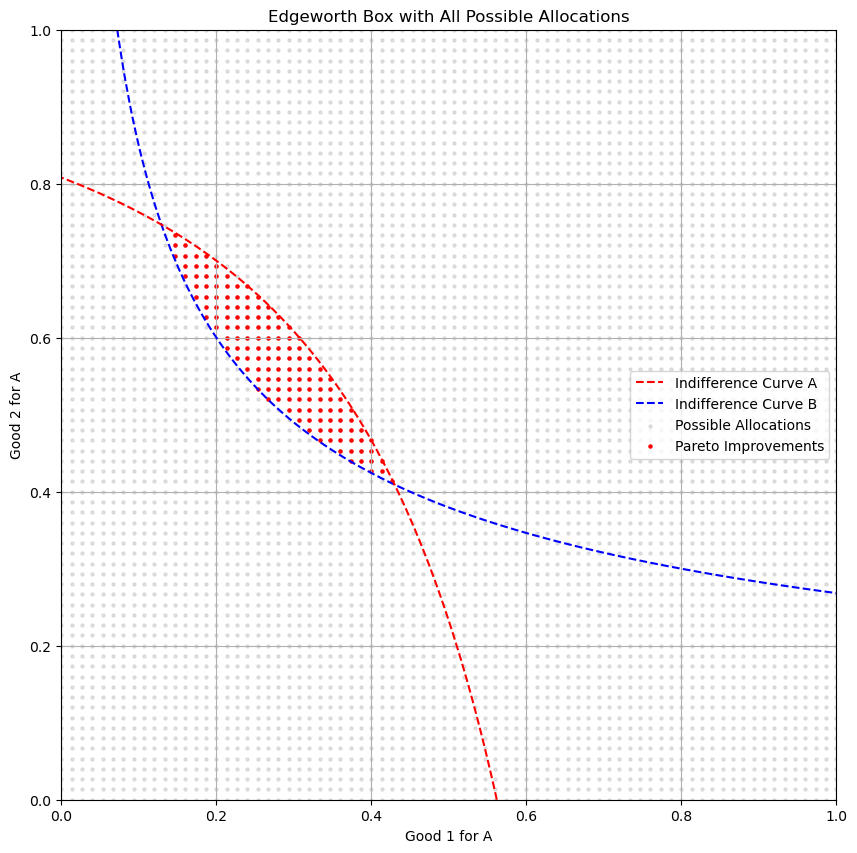

In [ ]:
# Unpacking allocations and Pareto improvements
pareto_x1, pareto_x2 = zip(*pareto_improvements)  # Extracting Pareto improvements
all_x1, all_x2 = zip(*allocations)  # Extracting all possible allocations

plt.figure(figsize=(10, 10))
plt.scatter(all_x1, all_x2, color='grey', s=5, alpha=0.2, label="Possible Allocations")
plt.scatter(pareto_x1, pareto_x2, color='red', s=5, label="Pareto Improvements")

x1 = np.linspace(0, 1, 100)  # Creates an array of 100 points between 0 and 1
x2 = np.linspace(0, 1, 100)


# Assuming utility_A and utility_B are your utility functions, needing appropriate definitions above
x1A_grid, x2A_grid = np.meshgrid(x1, x2)
x1B_grid, x2B_grid = np.meshgrid(1-x1, 1-x2)
utility_A_grid = utility_A(x1A_grid, x2A_grid, alpha)  # Assuming utility_A takes these parameters
utility_B_grid = utility_B(x1B_grid, x2B_grid, beta)  # Assuming utility_B takes these parameters

# Indifference curves
plt.contour(x1A_grid, x2A_grid, utility_A_grid, levels=[initial_utility_A], colors='blue', linestyles='dashed')
plt.contour(x1B_grid, x2B_grid, utility_B_grid, levels=[initial_utility_B], colors='red', linestyles='dashed')

# Creating custom legend for contour lines since plt.contour does not support 'label' argument
red_line = mlines.Line2D([], [], color='red', linestyle='dashed', label='Indifference Curve A')
blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label='Indifference Curve B')
plt.legend(handles=[red_line, blue_line, plt.scatter([],[], color='grey', s=5, alpha=0.2, label="Possible Allocations"), plt.scatter([],[], color='red', s=5, label="Pareto Improvements")])

plt.xlabel("Good 1 for A")
plt.ylabel("Good 2 for A")
plt.title("Edgeworth Box with All Possible Allocations")
plt.grid(True)
plt.show()


# Opgave 2

Market clearing error is calculated

We start by defining a set of prises p1. We use a list comprehension to create a set of all possible prises by the given algorithm, until it reaches 2.5

In [ ]:
p1 = [0.5 + (2 * i/N) for i in range(int(2*N) + 1) if 0.5 + i/N <= 2.5]
p1 = [i for i in p1 if i <= 2.5] # laver listen
print(p1) # printer liste for kontrol
p2 = 1 # Numeraire

[0.5, 0.5266666666666666, 0.5533333333333333, 0.58, 0.6066666666666667, 0.6333333333333333, 0.66, 0.6866666666666666, 0.7133333333333334, 0.74, 0.7666666666666666, 0.7933333333333333, 0.8200000000000001, 0.8466666666666667, 0.8733333333333333, 0.9, 0.9266666666666667, 0.9533333333333334, 0.98, 1.0066666666666668, 1.0333333333333332, 1.06, 1.0866666666666667, 1.1133333333333333, 1.1400000000000001, 1.1666666666666665, 1.1933333333333334, 1.22, 1.2466666666666666, 1.2733333333333334, 1.3, 1.3266666666666667, 1.3533333333333335, 1.38, 1.4066666666666667, 1.4333333333333333, 1.46, 1.4866666666666668, 1.5133333333333334, 1.54, 1.5666666666666667, 1.5933333333333333, 1.62, 1.6466666666666667, 1.6733333333333333, 1.7, 1.7266666666666666, 1.7533333333333334, 1.78, 1.8066666666666666, 1.8333333333333333, 1.86, 1.8866666666666667, 1.9133333333333333, 1.94, 1.9666666666666666, 1.9933333333333334, 2.02, 2.046666666666667, 2.0733333333333333, 2.1, 2.126666666666667, 2.1533333333333333, 2.1799999999

We define two empty lists for the errors in clearing prices.

In [ ]:
epsilon1_values = []
epsilon2_values = []

We define the marketerror by the two demands at the given price.

In [ ]:
for p1 in p1_values:
    epsilon1 = demand_A_x1(p1, omega_A1, omega_A2, alpha) + demand_B_x1(p1, omega_B1, omega_B2, beta) - (omega_A1 + omega_B1)
    epsilon2 = demand_A_x2(p1, omega_A1, omega_A2, alpha) + demand_B_x2(p1, omega_B1, omega_B2, beta) - (omega_A2 + omega_B2)
    epsilon1_values.append(epsilon1)
    epsilon2_values.append(epsilon2)

# Exercise 3

Now we find the market clearing price that minimizes the market clearing error.

In [ ]:
# Konverterer fejl-værdierne til absolutte værdier:
abs_epsilon1_values = np.abs(epsilon1_values)

# Finde indeks for minimum-værdien:
min_error_index = np.argmin(abs_epsilon1_values)

# Finder den pris der passer til minimumværdiens indeks.
market_clearing_p1 = p1_values[min_error_index]
market_clearing_error = epsilon1_values[min_error_index]

market_clearing_p1.round(3), market_clearing_error

(0.932, 0.007729468599033673)

We save the allocation for later use.

In [ ]:
allocation_3 = allocation_at_price(market_clearing_p1, alpha, omega_A1, omega_A2)
print(allocation_3)

(0.3739130434782609, 0.6972972972972974)


# Exercise 4.a

The initial utility is already calculated earlier. We thus start by variable which captures the maximum utility and we let it start by the value 0. We also pick an initual value which we leave at 0.

In [ ]:
max_utility = 0
optimal_p1 = None

Now we iterate over all possible values of p1, so we can calculate the demand from each consumer at the given prices and their utility functions. We use this to evaluate the different possible choices of consumer A.

We then examine the different prices, and check if consumer B's utiility is fallen (Pareto criteria), and check if we can pick an allocation that yields a higher utility for A.

Both things happen over the iteration, and the optimal p1 is updated accordingly.

In [ ]:
for p1 in p1_values:
    xA1 = demand_A_x1(p1, omega_A1, omega_A2, alpha)
    xA2 = demand_A_x2(p1, omega_A1, omega_A2, alpha)
    xB1 = demand_B_x1(p1, omega_B1, omega_B2, beta)
    xB2 = demand_B_x2(p1, omega_B1, omega_B2, beta)
    
    # Ensure x1 and x2 are within the bounds for both A and B
    if 0 <= xA1 <= 1 and 0 <= xA2 <= 1 and 0 <= xB1 <= 1 and 0 <= xB2 <= 1:
        utility_B_current = utility_B(xB1, xB2, beta)
        if utility_B_current >= initial_utility_B:  # Ensure B is not worse off
            utility_A_current = utility_A(xA1, xA2, alpha)
            if utility_A_current > max_utility:
                max_utility = utility_A_current
                optimal_p1 = p1

print(f"Optimal p1: {optimal_p1}, Maximum Utility for A: {max_utility}")

Optimal p1: 1.472972972972973, Maximum Utility for A: 0.6875211855852789


We save the allocation for later use.

In [ ]:
allocation_4a = allocation_at_price(optimal_p1, alpha, omega_A1, omega_A2)
print(allocation_4a)

(0.33455657492354746, 0.9855855855855858)


# Exercise 4b

We optimise the allocation for A by maximising the utility for A, but where A can pick any prices (not only those defined in exercise 2)

We first define constraints (pareto criteria).

In [ ]:
def constraints(x, omega_B1, omega_B2, beta):
    x1, x2 = x[0], x[1]
    return [
        utility_B(x1, x2, beta) - utility_B(omega_B1, omega_B2, beta),  # Ensure utility B is at least its initial value
        1 - x1,  # x1 must be <= 1
        1 - x2   # x2 must be <= 1
    ]


Next, we define the objective function. The objective function maximizes Consumer A's utility by continuously adjusting the price.

This is done by first calculating Consumer B's consumption of both goods at the given price, after which Consumer A's consumption is determined as the remaining part of the total stock (Walras).

The function returns the negative value of Consumer A's utility to enable maximization through a minimization process (as Scipy.Optimize Minimize indeed minimizes).

In [ ]:

# Objective function to maximize A's utility by choosing p1
def objective(x, alpha):
    x1, x2 = x[0], x[1]
    return -utility_A(x1, x2, alpha)  # Negating because we're maximizing A's utility


Finally, we then use the minimize() function.

The function is structured as follows:
minimize(function to be minimized, initial guess, bounds on the variables, constraints)

We have fun=objective because it is our objective function that needs to be minimized. (negative objective function)

We have x0=np.array([1]) as an initial guess because we want the possibility to have multiple dimensions (this is standard, even though we could do scalar optimization, i.e., 1 variable)

We have bounds=[(0, 1)] as bounds that p1 must be positive, and p2 is not bound.

In [ ]:
initial_guess = [0.1, 0.1]  # Initial guess for x1 and x2

# Optimization call
result = minimize(
    fun=objective,
    x0=initial_guess,
    args=(alpha,),
    bounds=[(0, 1), (0, 1)],  # Explicit bounds for x1 and x2
    constraints={
        'type': 'ineq',
        'fun': constraints,
        'args': (omega_B1, omega_B2, beta)
    }
)

In [ ]:
# Handling the results of optimization
if result.success:
    x1_optimal, x2_optimal = result.x
    print(f"Optimal x1: {x1_optimal:.3f}, Optimal x2: {x2_optimal:.3f}")
else:
    print("Optimization failed:", result.message)

Optimal x1: 0.289, Optimal x2: 0.620


We save the allocation for later use.

In [ ]:
allocation_4b = x1_optimal, x2_optimal

# Opgave 5a

We have previously defined the set of allocations with Pareto improvements.

Now we define two variables to capture the highest utility from the allocations, as well as the optimal allocation itself.

In [ ]:
max_utility_A = -np.inf # Starter ved minus uendelig.
optimal_allocation = None # Gøres tom fra starten (skal være None, fordi det bliver et sæt af værdier).

Now we iterate over the different allocations and check if the current_utility is higher than max_utility - if yes, then we replace the value.

In [ ]:
# Iterate over each possible allocation in pareto_improvements
for allocation in pareto_improvements:
    x1, x2 = allocation
    current_utility_A = utility_A(x1, x2, alpha)
    # Check if the current utility is greater than the max utility found so far
    if current_utility_A > max_utility_A:
        max_utility_A = current_utility_A
        optimal_allocation = (x1, x2)

We save them as x1_max and x2_max.

In [ ]:
x1_max, x2_max = optimal_allocation

And we print the values.

In [ ]:
# Printing the results with proper formatting
label_width = max(len("Optimal x1:"), len("Optimal x2:"), len("Max Utility A:"))
spacing = 2  # Spaces between the longest label and the value

print(f"{'Optimal x1:':<{label_width}}{' ' * spacing}{x1_max:12.4f}\n"
      f"{'Optimal x2:':<{label_width}}{' ' * spacing}{x2_max:12.4f}\n"
      f"{'Max Utility A:':<{label_width}}{' ' * spacing}{max_utility_A:12.4f}")

Optimal x1:           0.3067
Optimal x2:           0.6000
Max Utility A:        0.4797


we save the allocation for later use.

In [ ]:
allocation_5a = (x1_max, x2_max)
print(allocation_5a)

(0.30666666666666664, 0.6)


# Exercise 5b

First, the constraint is defined that consumer B's utility is not lower than initial (Pareto constraint).

In [ ]:
def constraint_C(x):
    x1, x2 = x[0], x[1]
    utility_A_current = utility_A(x1, x2, alpha)
    utility_B_current = utility_B(x1, x2, beta)  
    return utility_A_current - initial_utility_A, utility_B_current - initial_utility_B

Now we define negative utility.

In [ ]:
def neg_utility_A(x):
    x1, x2 = x[0], x[1]
    return -utility_A(x1, x2, alpha)

And we perform the optimisation.

In [ ]:
initial_guess = [0.1, 0.1]

# Define bounds for allocations
bounds = [(0, None), (0, None)]  # Corrected to apply to both x1 and x2

# Perform the optimization to minimize negative utility of A sutility_Bject to constraints
result = minimize(neg_utility_A, x0=initial_guess, bounds=bounds, constraints={'type': 'ineq', 'fun': constraint_C})

x1_max, x2_max = result.x
utility_A_max = -result.fun

Printing the results with proper formatting

In [ ]:
label_width = max(len("Optimal x1:"), len("Optimal x2:"), len("Max Utility A:"))
spacing = 2  # Spaces between the longest label and the value

print(f"{'Optimal x1:':<{label_width}}{' ' * spacing}{x1_max:12.4f}\n"
      f"{'Optimal x2:':<{label_width}}{' ' * spacing}{x2_max:12.4f}\n"
      f"{'Max Utility A:':<{label_width}}{' ' * spacing}{utility_A_max:12.4f}")


Optimal x1:           0.2895
Optimal x2:           0.6197
Max Utility A:        0.4808


And saving the allocation for later use.

In [ ]:
allocation_5b = (x1_max, x2_max)
print(allocation_5b)

(0.28946997909636835, 0.61969154268848)


So, we see that we have obtained a slightly higher utility, and this is because we do not limit the choice to the sets we had calculated with N=75.

Thus, we can choose from infinitely many more sets, but this requires using an optimizer and not just examining allocations.

# Exercise 6a

First, we define our utility function (objective function) that we want to optimize. This is defined as the negative utility function, since we are again using a minimize() function.

In [ ]:
def planner_utility(x1, x2, alpha, beta):
    total_utility = utility_A(x1, x2, alpha) + utility_B(x1, x2, beta)
    return total_utility

def planner_objective(x, alpha, beta):
    x1, x2 = x[0], x[1]
    return -planner_utility(x1, x2, alpha, beta)

The only restriction is that x1 and x2 must each be between 0 and 1, but this is already given by the initial endowments.

Therefore, we can proceed directly to optimization without restrictions.

In [ ]:
x0 = np.array([0.1, 0.1]) # Laver initialgættet

# Definerer bounds
bounds = [(0, 1), (0, 1)]  # Assuming x1 and x2 should be between 0 and 1.

# Perform the optimization
result = minimize(fun=planner_objective, x0=x0, args=(alpha, beta), bounds=bounds)

# Extract the results
x1_max, x2_max = result.x
# To get the maximum utility, calculate it directly using the optimal x1 and x2 found
utility_A_max = utility_A(x1_max, x2_max, alpha)
utility_B_max = utility_B(x1_max, x2_max, beta)

# Printing the results
print(f"Optimal x1: {x1_max}\nOptimal x2: {x2_max}\nUtility for A: {utility_A_max}\nUtility for B: {utility_B_max}")

Optimal x1: 0.33333540514158244
Optimal x2: 0.6666669979961634
Utility for A: 0.5291349555686058
Utility for B: 0.5291324124080086


And saving the allocation for later use.

In [ ]:
allocation_6a = (x1_max, x2_max)
print(allocation_6a)

(0.33333540514158244, 0.6666669979961634)


# Opgave 6b

In [ ]:
allocation_3, allocation_4a, allocation_4b, allocation_5a, allocation_5b, allocation_6a

((0.3739130434782609, 0.6972972972972974),
 (0.33455657492354746, 0.9855855855855858),
 (0.2894699800865892, 0.6196915416301546),
 (0.30666666666666664, 0.6),
 (0.28946997909636835, 0.61969154268848),
 (0.33333540514158244, 0.6666669979961634))

In [ ]:
specific_allocations = allocation_3, allocation_4a, allocation_4b, allocation_5a, allocation_5b, allocation_6a

(0.3739130434782609, 0.6972972972972974) (0.33455657492354746, 0.9855855855855858) (0.2894699800865892, 0.6196915416301546) (0.30666666666666664, 0.6) (0.28946997909636835, 0.61969154268848) (0.33333540514158244, 0.6666669979961634)


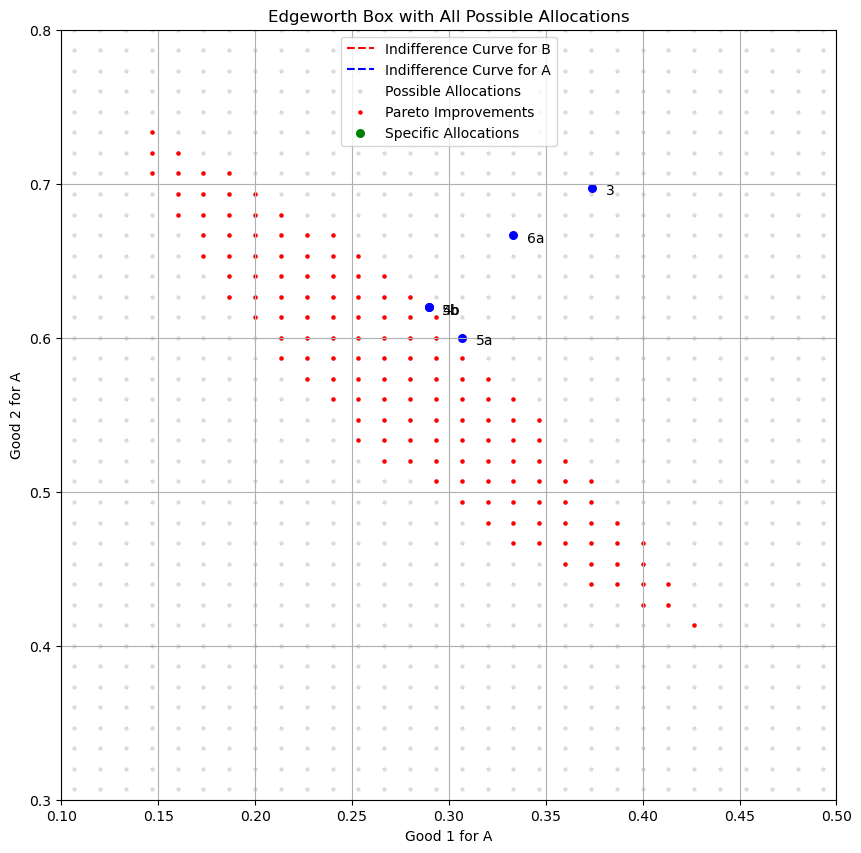

In [ ]:

# Unpacking allocations and Pareto improvements
pareto_x1, pareto_x2 = zip(*pareto_improvements)  # Extracting Pareto improvements
all_x1, all_x2 = zip(*allocations)  # Extracting all possible allocations
specific_labels = ['3', '4a', '4b', '5a', '5b', '6a']  # Labels for specific allocations
specific_x1, specific_x2 = zip(*specific_allocations)  # Extract x1 and x2 components

plt.figure(figsize=(10, 10))
plt.scatter(all_x1, all_x2, color='grey', s=5, alpha=0.2, label="Possible Allocations")
plt.scatter(pareto_x1, pareto_x2, color='red', s=5, label="Pareto Improvements")
specific_points = plt.scatter(specific_x1, specific_x2, color='blue', s=30, label="Specific Allocations")

# Label specific allocations
for i, label in enumerate(specific_labels):
    plt.annotate(label, (specific_x1[i], specific_x2[i]), textcoords="offset points", xytext=(10,-5), ha='left')

# Generating grids for indifference curves
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
x1A_grid, x2A_grid = np.meshgrid(x1, x2)
x1B_grid, x2B_grid = np.meshgrid(1-x1, 1-x2)

utility_A_grid = utility_A(x1A_grid, x2A_grid, alpha)
utility_B_grid = utility_B(x1B_grid, x2B_grid, beta)

# Plotting indifference curves
plt.contour(x1A_grid, x2A_grid, utility_A_grid, levels=[initial_utility_A], colors='blue', linestyles='dashed')
plt.contour(x1B_grid, x2B_grid, utility_B_grid, levels=[initial_utility_B], colors='orange', linestyles='dashed')

# Custom legend for contour lines
red_line = mlines.Line2D([], [], color='red', linestyle='dashed', label='Indifference Curve for B')
blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label='Indifference Curve for A')
plt.legend(handles=[red_line, blue_line, plt.scatter([], [], color='grey', s=5, alpha=0.2, label="Possible Allocations"), plt.scatter([], [], color='red', s=5, label="Pareto Improvements"), plt.scatter([], [], color='green', s=30, label="Specific Allocations")])

plt.xlabel("Good 1 for A")
plt.ylabel("Good 2 for A")
plt.xlim([0.1, 0.5])
plt.ylim([0.3, 0.8])
plt.title("Edgeworth Box with All Possible Allocations")
plt.grid(True)
plt.show()

# Exercise 7

We simply solve the exercise.

In [ ]:
W = np.random.uniform(0, 1, (50, 2))

# Exercise 8

We now have a set of initial allocations for consumer A. We can iterate over the set and solve the problem.

we start with an empty list.

In [ ]:
allocation_8 = []

Now we iterate over the random set.

In [ ]:
for omega_A1, omega_A2 in W:
    initial_utility_A = utility_A(omega_A1, omega_A2, alpha)
    initial_utility_B = utility_B(1 - omega_A1, 1 - omega_A2, beta)

    initial_guess = [0.1, 0.1]

    # Define bounds for allocations
    bounds = [(0, None), (0, None)]  # Bounds apply to both variables

    # Perform the optimization to minimize negative utility of A subject to constraints
    result = minimize(neg_utility_A, x0=initial_guess, bounds=bounds, constraints={'type': 'ineq', 'fun': constraint_C})

    x1_max, x2_max = result.x
    utility_A_max = -result.fun

    if x1_max <= 1 and x2_max <= 1:
        allocation_8.append((x1_max, x2_max))

/Users/jacob/Documents/GitHub/projects-2024-jacobogmads/Jacob/InaurguralJacob.py:22: RuntimeWarning: invalid value encountered in scalar power
  return (1-x1)**beta * (1-x2)**(1 - beta)


In [ ]:
print(allocation_8)

[(0.3469521903497347, 0.6800128794023463), (0.47862033785472685, 0.7859567205646198), (0.64162248097627, 0.8774718909937511), (0.1361525500108886, 0.3866713415808187), (0.3298699231390949, 0.6631851725571843), (0.34999791469392655, 0.6829248449935161), (0.5126877229610994, 0.808003297222587), (0.4526069051248243, 0.7678374274376973), (0.4898896845794423, 0.7934497945500449), (0.17322409185739282, 0.4559511802769977), (0.5163100632512099, 0.8102458955695045), (0.5507454171380036, 0.8306129229664467), (0.42987357909624135, 0.7509755414808412), (0.1605052329981989, 0.4333541162904551), (0.34791138109401953, 0.6809327602948957), (0.4356811216908828, 0.7553930355284908), (0.2518194049176571, 0.573762679289748), (0.5388895379266997, 0.823827344452158), (0.5873346722412199, 0.8505921187427172), (0.08207349295140114, 0.26343170193246634), (0.27339561207651875, 0.600807798818776), (0.20640983164715437, 0.5098964104743737), (0.37762898631129654, 0.7082025278568295), (0.1736125992153572, 0.456623

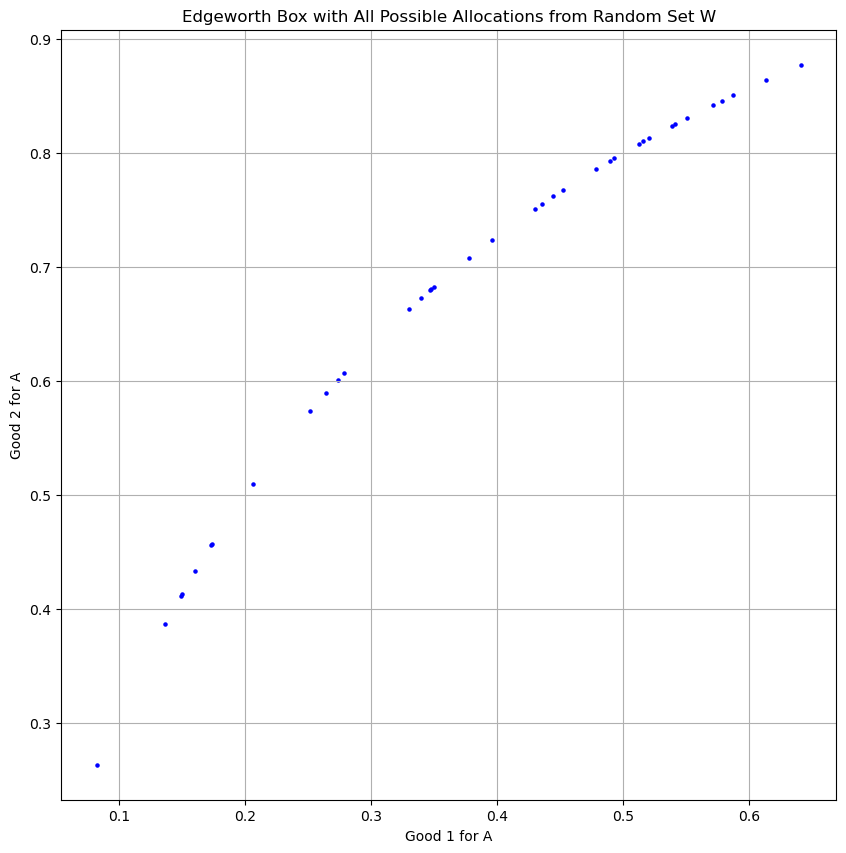

In [ ]:
all_x1, all_x2 = zip(*allocation_8)  # Extracting all possible allocations

plt.figure(figsize=(10, 10))
plt.scatter(all_x1, all_x2, color='blue', s=5, alpha=1, label="Possible Allocations")

x1 = np.linspace(0, 1, 100)  # Creates an array of 100 points between 0 and 1
x2 = np.linspace(0, 1, 100)

# Creating grid for utility calculations
x1A_grid, x2A_grid = np.meshgrid(x1, x2)
x1B_grid, x2B_grid = np.meshgrid(1 - x1, 1 - x2)

# Calculating utility for each point in the grid
utility_A_grid = utility_A(x1A_grid, x2A_grid, alpha)  # Assuming utility_A takes these parameters
utility_B_grid = utility_B(x1B_grid, x2B_grid, beta)  # Assuming utility_B takes these parameters

# Initial utilities for the starting allocation - using the first allocation as an example
initial_utility_A = utility_A(allocations[0][0], allocations[0][1], alpha)
initial_utility_B = utility_B(1 - allocations[0][0], 1 - allocations[0][1], beta)

# Plotting indifference curves
# Creating custom legend for contour lines since plt.contour does not support 'label' argument

plt.xlabel("Good 1 for A")
plt.ylabel("Good 2 for A")
plt.title("Edgeworth Box with All Possible Allocations from Random Set W")
plt.grid(True)
plt.show()